In [ ]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [1]:
from fastbook import *

#Kaggle Dataset Download

In [3]:
! pip install -q kaggle

In [4]:
from google.colab import files

In [5]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"borrowedbirch05","key":"f22eb1da055f262928827f504c424775"}'}

In [5]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets list

ref                                                    title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows                 Netflix Movies and TV Shows                    1MB  2024-04-10 09:48:38          25350        541  1.0              
zeesolver/spotfy                                       Spotify Songs Album                           47KB  2024-05-10 09:21:57           1983         27  1.0              
prasad22/weather-data                                  Weather Data                                  43MB  2024-05-18 14:27:35           1698         45  1.0              
mayankanand2701/zomato-stock-price-dataset             Zomato Stock Price Dataset 📊🍗🏨🍴               13KB  2024-05-23 06:42:34           100

In [10]:
!kaggle datasets download -d gpiosenka/100-bird-species

Dataset URL: https://www.kaggle.com/datasets/gpiosenka/100-bird-species
License(s): CC0-1.0
100%|██████████████████████████████████████▉| 1.95G/1.96G [00:20<00:00, 119MB/s]
100%|███████████████████████████████████████| 1.96G/1.96G [00:20<00:00, 102MB/s]


In [ ]:
!unzip 100-bird-species.zip -d dataset-birds

Archive:  100-bird-species.zip
  inflating: dataset-birds/EfficientNetB0-525-(224 X 224)- 98.97.h5  
  inflating: dataset-birds/birds.csv  
  inflating: dataset-birds/test/ABBOTTS BABBLER/1.jpg  
  inflating: dataset-birds/test/ABBOTTS BABBLER/2.jpg  
  inflating: dataset-birds/test/ABBOTTS BABBLER/3.jpg  
  inflating: dataset-birds/test/ABBOTTS BABBLER/4.jpg  
  inflating: dataset-birds/test/ABBOTTS BABBLER/5.jpg  
  inflating: dataset-birds/test/ABBOTTS BOOBY/1.jpg  
  inflating: dataset-birds/test/ABBOTTS BOOBY/2.jpg  
  inflating: dataset-birds/test/ABBOTTS BOOBY/3.jpg  
  inflating: dataset-birds/test/ABBOTTS BOOBY/4.jpg  
  inflating: dataset-birds/test/ABBOTTS BOOBY/5.jpg  
  inflating: dataset-birds/test/ABYSSINIAN GROUND HORNBILL/1.jpg  
  inflating: dataset-birds/test/ABYSSINIAN GROUND HORNBILL/2.jpg  
  inflating: dataset-birds/test/ABYSSINIAN GROUND HORNBILL/3.jpg  
  inflating: dataset-birds/test/ABYSSINIAN GROUND HORNBILL/4.jpg  
  inflating: dataset-birds/test/ABYSSINIAN

#Creating Dataloader Object

In [2]:
path = Path('./dataset-birds')

In [3]:
path

Path('dataset-birds')

In [4]:
Path.BASE_PATH = path

In [5]:
(path/'train').ls()

(#525) [Path('train/CARMINE BEE-EATER'),Path('train/IVORY BILLED ARACARI'),Path('train/FRIGATE'),Path('train/COPPERSMITH BARBET'),Path('train/GOLDEN CHEEKED WARBLER'),Path('train/GREAT TINAMOU'),Path('train/NORTHERN SHOVELER'),Path('train/ASIAN OPENBILL STORK'),Path('train/EMERALD TANAGER'),Path('train/AMERICAN GOLDFINCH')...]

In [9]:
imgs = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(),
                 get_y=parent_label,
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=300, min_scale=0.75))
dls = imgs.dataloaders(path/"train")

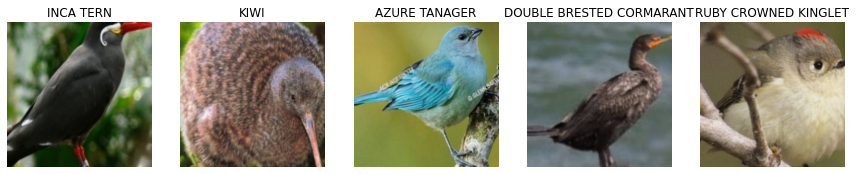

In [11]:
dls.show_batch(nrows=1, ncols=5)

In [12]:
learn = vision_learner(dls, resnet18, metrics=accuracy)

In [13]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,time
0,1.666820,0.857502,0.790276,07:08


epoch,train_loss,valid_loss,accuracy,time
0,0.716274,0.373724,0.910852,08:37


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)